In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
from sklearn import linear_model
df = pd.read_csv('demands.csv')
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import ensemble

In [199]:
#df.info()
df.columns

Index(['time', 'demands'], dtype='object')

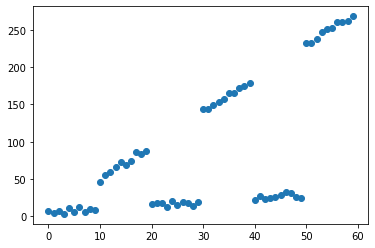

In [200]:
X = df.time.values.reshape(-1, 1)
Y = df.demands.values.reshape(-1,1)
plt.scatter(X, Y)


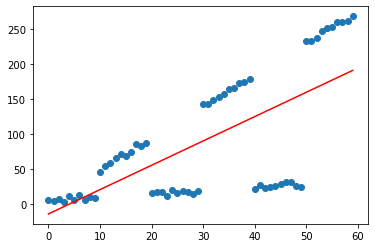

In [201]:
model1 = linear_model.LinearRegression()
model1.fit(X, Y)
Y_pred = model1.predict(X)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [202]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = model1.score(X,Y)
print('R2 sq: ', model_score)

R2 sq:  0.45496040269843796


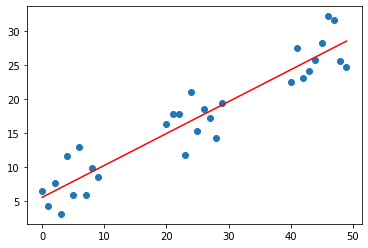

R2 sq:  0.8872004519685401


In [203]:
first_x = df.time[(df.time%20>=0)&(df.time%20<10)].values.reshape(-1, 1)
first_y = df.demands[(df.demands<40)].values.reshape(-1, 1)
model2 = linear_model.LinearRegression()
model2.fit(first_x, first_y)
first_y_pred = model2.predict(first_x)

plt.scatter(first_x, first_y)
plt.plot(first_x, first_y_pred, color='red')
plt.show()
model_score_first = model2.score(first_x, first_y)
print('R2 sq: ', model_score_first)


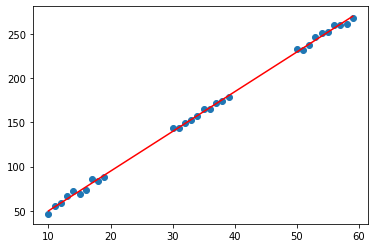

R2 sq:  0.9987560847997079


In [204]:
second_x = df.time[(df.time%20>=10)].values.reshape(-1, 1)
second_y = df.demands[(df.demands>40)].values.reshape(-1, 1)
model3 = linear_model.LinearRegression()
model3.fit(second_x, second_y)
second_y_pred = model3.predict(second_x)

plt.scatter(second_x, second_y)
plt.plot(second_x, second_y_pred, color='red')
plt.show()
model_score_second = model3.score(second_x, second_y)
print('R2 sq: ', model_score_second)


In [205]:
# also we can compare other stuff
# The mean squared error
# print("Mean squared error: %.2f"% mean_squared_error(y_test, results))
# Explained variance score: 1 is perfect prediction
# print('Test Variance score: %.2f' % r2_score(y_test, results))

In [206]:
params = {'n_estimators': 50, 'max_depth': 1, 'learning_rate': 1, 'loss': 'ls'}
model5 = ensemble.GradientBoostingRegressor(**params)
model5.fit(x, y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=1, loss='ls', max_depth=1,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [207]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = model5.score(x,y)
print('R2 sq: ',model_score)

R2 sq:  0.9984205316510204


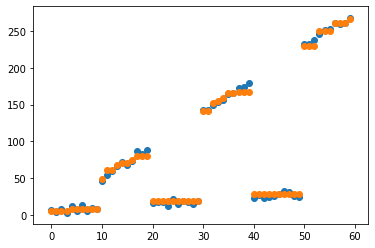

In [208]:
predict = model5.predict(x)
from sklearn.model_selection import cross_val_predict
plt.scatter(x, y)
plt.scatter(x, predict)

